# TD Wordclouds (Group 2)

**Authors:** CHRETIEN Jérémy, DAVIDSON Colin, LAFAGE Adrien, REMBUSCH Gabrielle and WILBRINK Aurore.

In [ ]:
from bs4 import BeautifulSoup as bs
import matplotlib.pyplot as plt
import requests
import re
import string
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
from nltk import ngrams
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Web scrapping

In [ ]:
class WebScraping():
    def __init__(self, url):
        """ Scraps a web page according to an url.
        Parameter
        ---------
        url: str
        """
        page = requests.get(url)
        self.article = bs(page.text, "html.parser").find(id="block-system-main")
        self.sections = self.article.find_all("ul")
        self.pros_idx: int
        self.cons_idx: int
        self.find_pros_cons_idx()
    
    def find_pros_cons_idx(self):
        """ Finds pros and cons sections indexes.
        """
        for i in range(len(self.sections)):
            if self.sections[i].find("h4") is not None:
                if self.sections[i].find("h4").text == "\n Pros":
                    self.pros_idx = i
                elif self.sections[i].find("h4").text == "\n Cons":
                    self.cons_idx = i

    def get_content(self, idx):
        """ Returns section contents according to an index.
        """
        pros = self.sections[idx]
        elements = pros.find_all("li")
        output = []
        for elt in elements:
            output.append(elt.text)
        return output
    
    def get_pros(self):
        """ Returns pros
        """
        return self.get_content(self.pros_idx)
    
    def get_cons(self):
        """ Returns cons
        """
        return self.get_content(self.cons_idx)

In [ ]:
def getCluster(urls):
    """
    Retrieves all pros and cons from urls (specific ones) and returns them in 
    two simple strings.
    """
    pros = ""
    cons = ""
    for url in urls:
        contents = WebScraping(url)
        pros += " ".join(contents.get_pros())
        cons += " ".join(contents.get_cons())
    return pros, cons

## Text Processing



In [ ]:
# n: 1 or 2 (mono or bigram)

def preprocess(input_str, n):
    """
    Gets text and returns a list of strings (of 1 or 2 words, according to n)
    """
    processed_str = input_str.lower() #lowercase
    processed_str = re.sub(r'\d+', '', processed_str) # remove numbers
    processed_str = processed_str.replace("-", " ")
    processed_str = processed_str.translate(str.maketrans("","", string.punctuation)) # remove punctuation
    processed_str = processed_str.strip() # remove leading and ending spaces
    tokens = word_tokenize(processed_str) # tokenization
    # remove stop words
    stop_words = set(stopwords.words('english'))
    if n == 1:
      stop_words |= {'thats', 'b', 'lot', 'listed', 'six', 'q', 'k', '—', '’', '“', '”', 'good', 'qx', 'run', 'low', 'pros', 'cons', 'around', 'added', 'great', 'visibility', 'interior', 'power', 'high', 'very', 'without', 'two', 'back', 'particularly', 'getting', 'eyes', 'got', 'even','inside', 'car', 'really', 'four', 'front', 'infiniti', 'little', 'fall', 'quite', 'still', 'looking', 'beyond', 'small', 'tight'}
    elif n==2:
      stop_words |= {'thats', 'q', 'k', '—', '’', '“', '”', 'qx', 'pros', 'cons', 'around', 'without', 'really', 'would', 'probably', 'overall', 'sporty', 'get', 'b'}
    result = [i for i in tokens if not i in stop_words]
    # put into a string
    str_result = ""
    for word in result:
        str_result = str_result + word + " "
    grams = ngrams(str_result.split(), n) # get mono/bi grams
    grams = list(grams)
    for i in range(len(grams)):
        grams[i] = "_".join(grams[i])
    return grams



## WordClouds



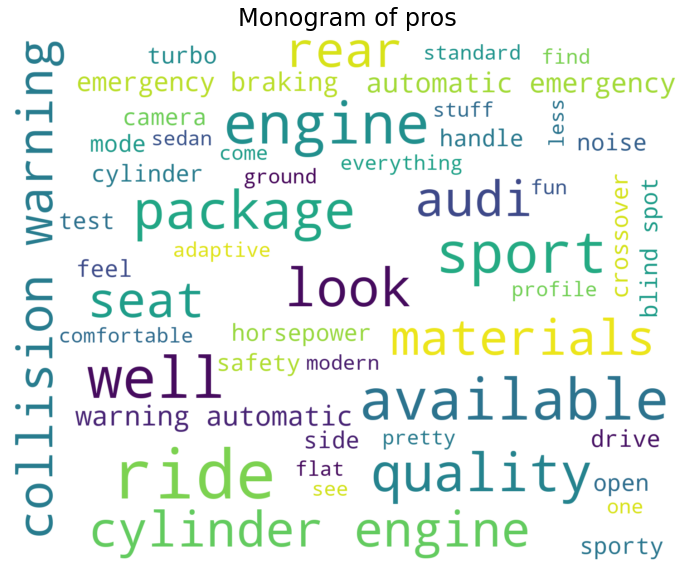

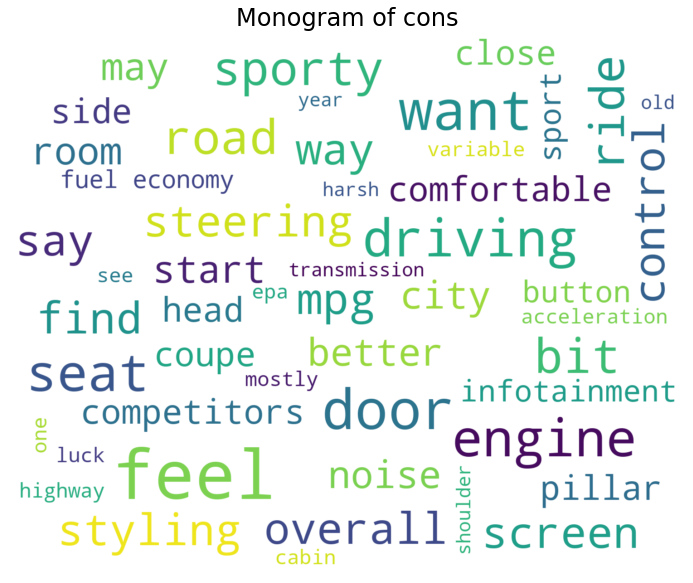

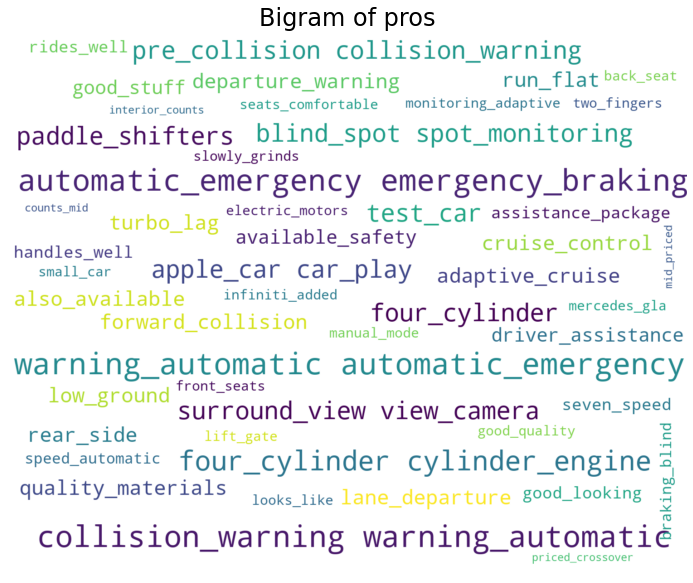

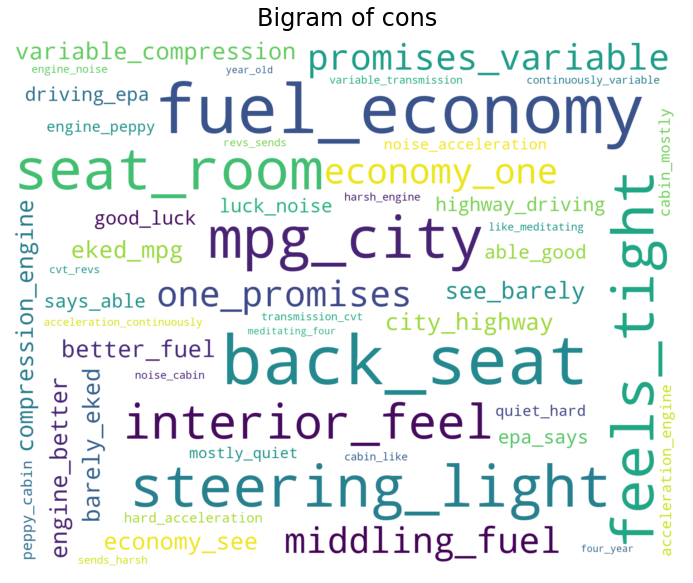

In [ ]:
# wordcloud creation
# besoin de text qui est la sortie du preprocessing

def showWC(text, title):
    """
    Shows a word cloud based on text, which is a list of words (ideally preprocessed)
    """
    wc = WordCloud(max_words=50, max_font_size=50, margin=10, background_color='white', scale=3, relative_scaling=0.5, width=500, height=400, random_state=1).generate(' '.join(text))
    plt.figure(figsize=(20,10))
    plt.imshow(wc, interpolation="bilinear")
    plt.title(title, fontsize=24)
    plt.axis("off")
    plt.show()


# Define pages to webscrap
pages = [
"https://www.cartalk.com/content/2020-infiniti-qx50-essential-awd",
"https://www.cartalk.com/content/infiniti-q50-30t-sport-awd-2017",
"https://www.cartalk.com/content/infiniti-q60-30t-premium-2017",
"https://www.cartalk.com/content/infiniti-qx30-sport-2017",
"https://www.cartalk.com/content/infiniti-qx-2016",
]

# Get pros and cons
pros, cons = getCluster(pages)

# Pre process infos
pp_pros1 = preprocess(pros, 1)
pp_cons1 = preprocess(cons, 1)

pp_pros2 = preprocess(pros, 2)
pp_cons2 = preprocess(cons, 2)

# Show WordClouds
showWC(pp_pros1, "Monogram of pros")
showWC(pp_cons1, "Monogram of cons")
showWC(pp_pros2, "Bigram of pros")
showWC(pp_cons2, "Bigram of cons")